In [1]:
from smarts_impropers import *

In [2]:
import qcportal as ptl

client = ptl.FractalClient()  

smarts = ["[#6X3:1]~[#6X3:2](~[#6X3:3])-!@[#7X3:4](-[#6H3])"]
optimization_datasets = [
    'OpenFF Gen 2 Opt Set 1 Roche',
#     'OpenFF Industry Benchmark Season 1 v1.0'
]
for i in range(len(smarts)):
    opts, ind_set, wbos = get_gopt_matching_improper(smarts[i], optimization_datasets, client)
    print(len(opts))

[]
2


0.9933028247667343 (3, 4, 5, 9)


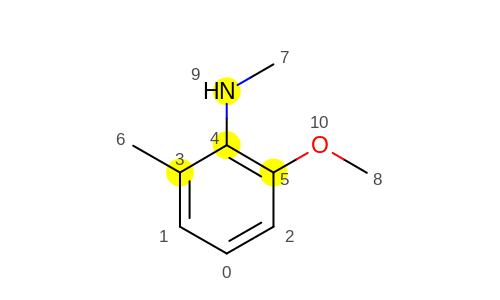

0.993887258918651 (3, 4, 5, 8)


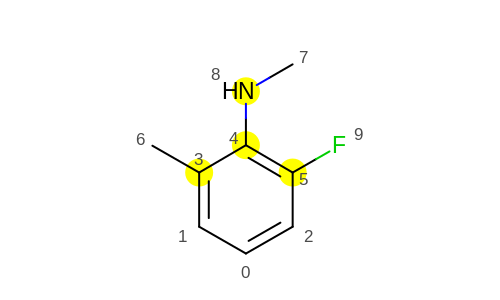

In [3]:
count = 0
for i, opt in enumerate(opts[0:10]):
    count = count + 1
    offmol = Molecule.from_mapped_smiles(opt.attributes['canonical_isomeric_explicit_hydrogen_mapped_smiles'])
    oemol = offmol.to_openeye()
    opt_id = opts[i].object_map['default']
    for j, improper_indices in enumerate(ind_set[opt_id]):
        print(wbos[opt_id][j], improper_indices)
        display(show_oemol_struc(oemol, torsions=True, atom_indices=improper_indices))